In [1]:
import numpy as np

In [33]:
eps_lst = [1, 0.1, 0.01, 0.005]

def _Df_i(i, x_i, eps):
    return (i / eps) + (2 * x_i) / (1 - (x_i ** 2))

def Df(x, eps):
    grad = []
    for i in range(len(x)):
        grad.append(_Df_i(i, x[i], eps))
    return np.array(grad)

def _Hf_i(x_i):
    return (2 + 2 * x_i ** 2) / (1 - x_i ** 2) ** 2
#     return (4 * (1 - x_i ** 2) + 8 * (x_i ** 2)) / (1 - x_i ** 2)

def Hf(x):
    hes = []
    for x_i in x:
        hes.append(_Hf_i(x_i))
    return np.diag(np.array(hes))

def lamb(x, eps):
    grad, hes = Df(x, eps), Hf(x)
    hes_inv = np.linalg.inv(hes)
    return np.sqrt(grad.T @ hes_inv @ grad)

In [48]:
M = 1
lamb_lst = []
for eps in eps_lst:
    x = np.zeros(10)
    lambs = [1e-6] * 22
    i = 0
    while lamb(x, eps) >= 1e-6:
        lambd = lamb(x, eps)
        lambs[i] = lambd
        Hf_inv = np.linalg.inv(Hf(x))
        x -= Hf_inv @ Df(x, eps) / (1 + M * lambd)
        i += 1
    print(len(lambs))
    lamb_lst.append(lambs)

22
22
22
22


Text(0, 0.5, 'lambda value')

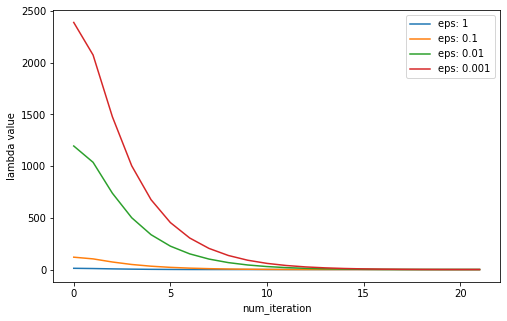

In [53]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8, 5))
ax = plt.axes()

x = np.arange(0, 50)
ax.plot(np.arange(22), lamb_lst[0], label = 'eps: 1')
ax.plot(np.arange(22), lamb_lst[1], label = 'eps: 0.1')
ax.plot(np.arange(22), lamb_lst[2], label = 'eps: 0.01')
ax.plot(np.arange(22), lamb_lst[3], label = 'eps: 0.001')
ax.legend()
ax.set_xlabel('num_iteration')
ax.set_ylabel('lambda value')